# Workshop 4
Fabián González Vera A01367585
23/08/2023

# 6 CHALLENGE: Estimate a market regression model

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#   Calculate cc returns of both stocks and drop NA values


# Getting price data and selecting adjusted price columns:
#sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = yf.download(tickers='ALFAA.MX ^MXX', start="2018-01-01", end="2022-07-31", interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']
sr

[*********************100%%**********************]  2 of 2 completed


,ALFAAret,MXXret
Date,,
2018-02-01,-0.042411,-0.061683
2018-03-01,0.040844,-0.028070
2018-04-01,0.030446,0.047283
2018-05-01,-0.159022,-0.079500
2018-06-01,0.120384,0.065024
2018-07-01,0.093341,0.041805
2018-08-01,-0.009111,-0.003029
2018-09-01,-0.040607,-0.000879
2018-10-01,-0.119598,-0.119174


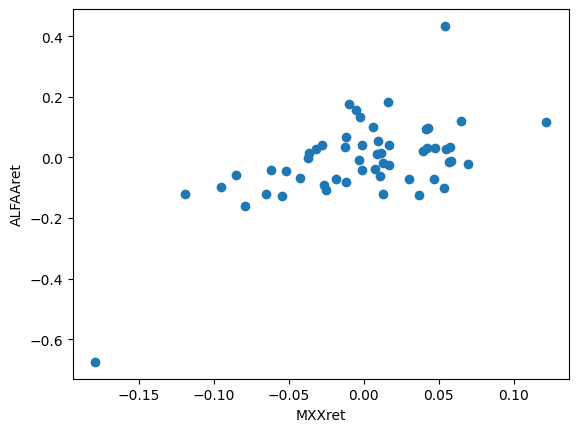

In [8]:
# Do a scatter plot including the regression line and interpret the plot

plt.scatter(y=sr['ALFAAret'], x=sr['MXXret'])
plt.ylabel('ALFAAret')
plt.xlabel('MXXret')
plt.show()

# IT SEEMS THAT MOST VALUES ARE IN THE NEGATIVE, ALSO MOST VALUES ARE CONCENTRATED AROUND 0 IN BOTH AXIS

 we can re-do the scatter plot trying to make the X and Y axis using the same range of values

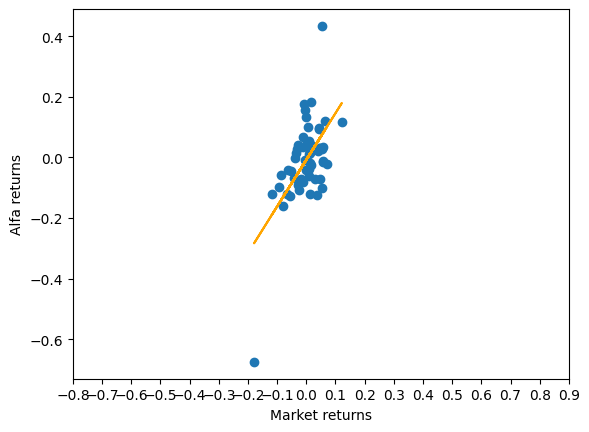

In [9]:
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)

# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

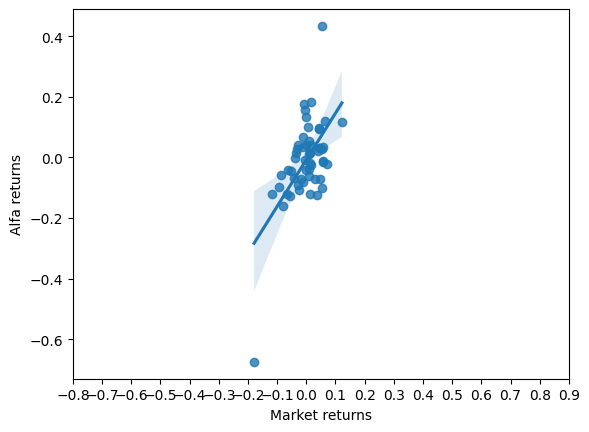

In [11]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()
sns.regplot(x=x, y=y)
plt.xticks(np.arange(-0.80,1,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library

In [18]:
import statsmodels.api as sm

# add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)

result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        10:35:06   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

Write down the regression equation

E[y] = b0 + b1xi

E[ALFAret] = -0.0080 + 1.5387 * MXXret

## 8 CHALLENGE: Estimate moving betas for the market regression model

1. Download monthly stock prices for ALFAA.MX and the market (^MXX) from Jan 2010 to Jul 2022, and calculate cc returns.

In [22]:
sprices = yf.download(tickers='ALFAA.MX ^MXX', start="2010-01-01", end="2022-07-31", interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']
sr

[*********************100%%**********************]  2 of 2 completed


,ALFAAret,MXXret
Date,,
2010-02-01,0.022043,0.040083
2010-03-01,0.121706,0.050299
2010-04-01,-0.015210,-0.017562
2010-05-01,-0.046475,-0.020048
2010-06-01,0.056757,-0.027901
...,...,...
2022-03-01,-0.015107,0.057067
2022-04-01,-0.097672,-0.094902
2022-05-01,0.100815,0.006486


2. Run rolling regressions and save the moving and coefficients for all time windows.

In [23]:
from statsmodels.regression.rolling import RollingOLS
# use the function RollingOLS that automatically performs rolling regressions by 
# shifting the 36-moth window by 1 month in each iteration.
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params

betas.tail()

,const,MXXret
Date,,
2022-03-01,-0.022426,1.877835
2022-04-01,-0.016308,1.803981
2022-05-01,-0.014117,1.816946
2022-06-01,-0.012129,1.720952
2022-07-01,-0.012282,1.706227


3. Do a plot to see how b1 and b0 has changed over time.

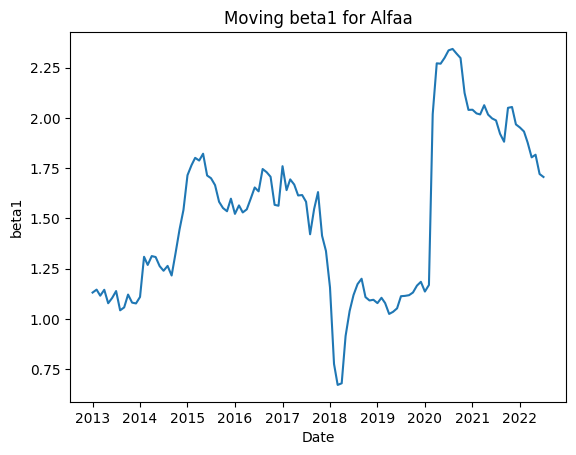

In [24]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

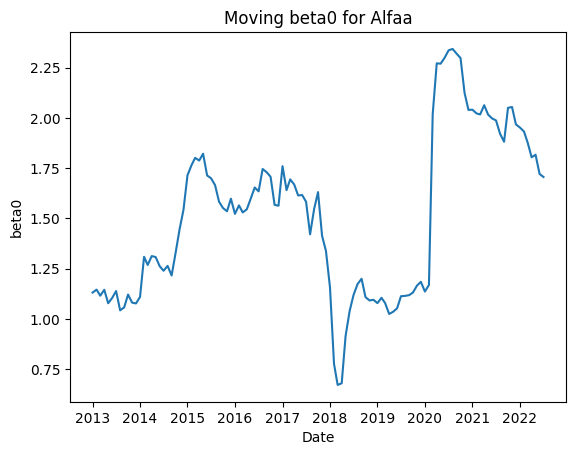

In [25]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

Beta coefficients are not constant, but we can appreciate how much they change over time, using their standard deviation

Their mean and standard deviation can be rapidly calculated with df.describe, with this we can compare to the original regression

In [26]:
betas.describe()

,const,MXXret
count,115.000000,115.000000
mean,-0.002615,1.513427
std,0.015600,0.402208
min,-0.025598,0.671151
25%,-0.014346,1.133487
50%,-0.009506,1.546794
75%,0.008243,1.794688
max,0.030594,2.343574
